# 線形モデル
- 実用的に広くつかわれている
- 入力特徴量を線形関数(linear function)を用いて予測を行う


回帰問題で線形モデルによる一般的な予測式は以下の用になる

$$ y^ = w[0] ✕ x[0] + w[1] ✕ x[1] + ・・・ + w[p] ✕ x[p] + b $$

- x[0]からx[p]はある1データポイントの特徴量を示す(この例では特徴量の数はp+1)
- wとbは学習されたモデルのパラメタ

特徴量が一つしかない場合はつぎのようになる

$$ y^ = w[0] ✕ x[0] + b $$

- この式は直線(y=ax+b)を表している
- 別の考え方として予測されるレスポンスは入力特徴量の重み付き和になるとも考えることができる(重みはwで表され負になることもある)


In [2]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler
from sklearn.model_selection import train_test_split
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 一次元のwaveデータセットでw[0]とbを求める

w[0]: 0.393906  b: -0.031804


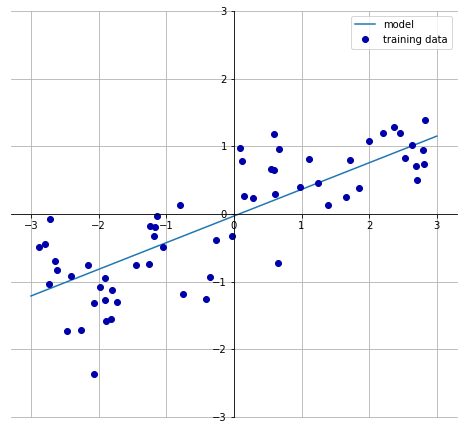

In [3]:
mglearn.plots.plot_linear_regression_wave()

- 回帰における線形モデルは単一の特徴量に対しては予測が直線になる回帰モデルとして特徴付けられる
- 特徴量が2つなら予測は平面に、高次元においては予測は超平面になる

------------

## 線形回帰(通常最小二乗法: ordinary least squares: OLS)
- 最も単純で最も古典的な線形回帰手法
- 線形回帰では訓練データにおいて予測と真の回帰ターゲットyとの`平均2乗誤差`が最小になるようにパラメタwとbを求める
    - 平均二乗誤差は予測と真の値との差を2乗したものの平均値
- 線形回帰にはパラメータがない=モデルの複雑さを制御する方法がない

In [4]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

lr = LinearRegression().fit(X_train, y_train)

# 傾き(w)は重みもしくは係数(cefficient)と呼ばれ「coef_」属性に格納される
print("lr.coef_: {}".format(lr.coef_))
# 切片(b)は「intercept_」属性に格納される
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746


### !point
- coef_やintercept_のようにscikit-learnでは訓練データから得られた属性には全て最後にアンダースコアをつける慣習になっている
    - これはユーザーが設定したパラメタと明確に区別するため

- intercept_属性は常に単独の浮動小数点数だが、coef_属性は入力特徴量ごとに一つの要素をもつNumPy配列となる

In [5]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


- R2が0.66というのは余り良くないが訓練セットとテストセットに対する値が非常に近い
- これはおそらく適合不足であって、過剰適合ではないことを意味する
- このような一次元データセットではモデルが非常に単純なため過剰適合の危険は少ない

### 高次元のデータセットによる検証

In [6]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


- このように訓練セットとテストセットで性能が大きく異なるのは過剰適合が起きている明らかな兆候
- これを解決するために複雑度を制御できるモデルを探さなくてはいけない

------------

リッジ回帰
--------------------
- 予測に用いられる式は、通常最小二乗法のものと同じ
- 係数(w)を訓練データに対する予測だけでなく、他の成約に対しても最適化する
    - 係数の絶対値の大きさを可能な限り小さくしたい(wの要素をなるべく0に近くしたい)
- この成約条件は正則化(refularization)の一例である
- ※正則化とは過剰適合を防ぐために明示的にモデルを制約すること
    - リッジ回帰で用いられる正則化はL2正則化と呼ばれる

In [8]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


- Ridgeの訓練セットに対するスコアはLinearRegressionの場合よりも低く、テストセットに対するスコアは高い
- 線形回帰ではデータに対して過剰適合していたが、Ridgeは成約の強いモデルなので過剰適合の危険性は少ない
- Ridgeモデルではモデルの簡潔さ(0に近い係数の数)と訓練セットに対する性能がトレードオフの関係になる
    - このどちらかに重きを置くかは、ユーザーがalphaパラメタを用いて指定することができる
    - alphaを増やすと係数はより0に近くなり訓練セットに対する性能は低下するが、汎化性能は上がる
    

### coef_属性からalphaパラメータの影響度を理解する

- alphaパラメータのモデルへの影響を定量的に知るには様々なalphaに対するモデルのcoef_属性を確認するのがよい
- alphaが大きい場合は小さい場合よりも_coef_の要素の絶対値が小さくなることが期待される

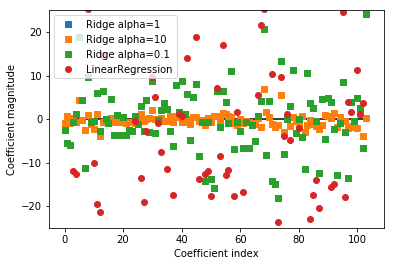

In [46]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 's', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 's', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

- alphaパラメータのモデルへの影響を定量的に知るには様々なalphaに対するモデルのcoef_属性を確認するのがよい
- alphaが大きい場合は小さい場合よりも_coef_の要素の絶対値が小さくなることが期待される

- 上の図のx軸はcoef_の要素を表している
    - x=0は最初の特徴量に対する係数。x=1は2番目の特徴に対する係数...
    
- y軸は特徴量に対応する係数の数値を表している
    - この図ではalpha=10ではほとんどの係数が-3から3の間にあることがわかる
    - alpha=1ではもう少し広く
    - alpha=0.1では更に広い範囲になっている
    - 正則化されない線形回帰の場合(alpha=0と同じ)更に広くなる
    - つまりalphaが大きくなるほど、値の絶対値は抑制され範囲が小さくなる

### 正則化の影響を理解する
- alpha値を固定して利用できる訓練データの量を変化させることで正則化の影響を理解する

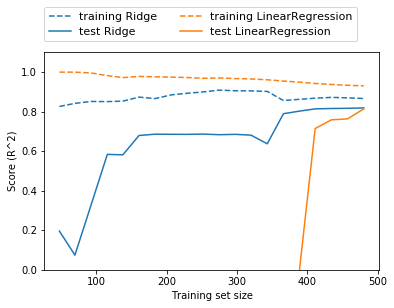

In [22]:
# boston_housingのデータセット
mglearn.plots.plot_ridge_n_samples()

- リッジ回帰でも線形回帰でも訓練スコアは全てのデータサイズにおいてテストスコアよりも高い
- リッジ回帰では正則化が行われているため、訓練スコアは線形回帰のものよりも常に低い
-　ただしテストスコアはリッジ回帰の方がよい
    - データが少ない時は顕著に差がある。(線形回帰は400以下だとほとんど学習できていない)
    - データが多くなるほど両者の差は小さくなり、最後は線形回帰が追いつく
- ここからわかることは「十分な訓練データがある場合には、正則化はあまり意味がない」ということ
    - 線形回帰ではデータ量が多くなると訓練性能がさがっている。これはデータ量がおおくなるとモデルが過剰適合することが難しくなるという事を示している

---------------------------
Lasso
---------------------------
- Ridgeに変わる線形回帰にはLassoがある
- Lassoもリッジ回帰と同様に係数が0になるように成約をかける(正則化する)
    - リッジはL2正則化だったがLassoはL1正則化
- Lassoにおいてはいくつかの係数が完全に0になる
    - これはモデルにおいて幾つかの特徴量が完全に無視されるということを指す
    - 自動的に特徴量を選択していると考えてもよい
    - 幾つかの係数が0になるとモデルを解釈しやすくなり、どの特徴量が重要なのかが明らかになる

In [24]:
# boston_housingのデータセットに適用する
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4.00


- 訓練セットに対してもテストセットに対しても非常に悪い
- これは適合不足であることを示唆している
- さらに104ある特徴量のうちわずか4つしかつかっていない

---

- Ridgeと同じようにLassoにも係数を0に向かわせる強さを制御する正則化パラメータalphaがある
    - 上記の例ではデフォルトの1.0となっていた
- 適合不足の度合を減らすためには、alphaを減らせばよい
- この際に、max_iter(最大繰り返し回数)もデフォルトから増やしてやる必要がある

In [42]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33.00


- alphaを小さくすると、より複雑なモデルに適合するようになり、訓練データに対してもテストデータに対しても良い結果が得られている
- 性能はRidgeよりも少しだけ良いくらいだが、104の特徴量のうちわずか33しかつかっていない。これによりモデルは潜在的に理解しやすくなっている

### alphaを小さくしすぎた場合

In [43]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94.00


- alphaを小さくしすぎるとリッジの場合と同様に正則可の効果が薄れ過剰適合が発生し、性能はLinearRegressionと似たようなものになる

### モデルに対して係数をプロット

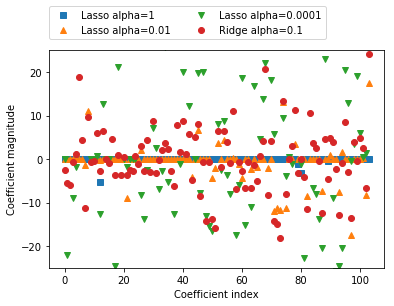

In [51]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

- alpha=1の場合はほとんどの係数が0
- alpha=0.1でもほとんどの特徴量に対する係数は0
- alpha=0.0001で正則化はかなり緩み多くの係数がゼロではなくなる

### まとめ
- 実際に使う場合はリッジをまず試すのがよい
- しかし、特徴量が沢山あってそのうち重要なものはわずかしかないことが予測されるのであればLassoの方が向いている
- 同様に解釈しやすいモデルが欲しいなら重要な特徴量のサブセットを選んでくれるLassoの方が理解しやすいモデルが得られる
- scikit-learnにはLassoとRidgeのペナルティを組み合わせたElasticNetがある。実用上はこの組み合わせが最良の結果をもたらすが、L1正則化パラメタとL2正則化パラメタの２つを調整するコストがかかる

クラス分類のための線形モデル
---------------------

$$ y^ = w[0] ✕ x[0] + w[1] ✕ x[1] + ・・・ + w[p] ✕ x[p] + b > 0 $$

- 上記の式は線形回帰と似ているが予測された値が0を超えるかで分割してる
    - 0より小さければクラスは-1になる
    - 0より大きければクラスは1になる
- この予測のルールは「全ての線形モデルによるクラス分類に共通している」
- 線形モデルによる回帰では出力^yは特徴量の線形関数になる
    - 直線や平面、高次元では超平面になる
- 線形モデルによるクラス分類では`決定境界`が入力の関数になる
    - 線形の2クラス分類機は2つのクラスを直線や平面や超平面で分割する
    
### 線形モデルを学習する為のアルゴリズム
- 係数と切片の特定の組み合わせと訓練データの適合度を図る尺度
    - 「訓練データへ適合度」を図る尺度は、アルゴリズムによって異なる。
    - アルゴリズムによるクラス分類ミスを最小化するようにwとbを調整したいと思うかもしれないが、技術的、数学的な理由からそれはできない
    - 我々の目的には、そして多くのアプリケーションにとっては(ロス関数)はあまり意味がない
- 正規化を行うか。行うならどの方法を使うか
    
###  ロジスティック回帰(logistic regression)/線形サポートベクターマシン(linear support vector machines: SVM)
 - ロジスティック回帰は回帰アルゴリズムではなくクラス分類アルゴリズムである


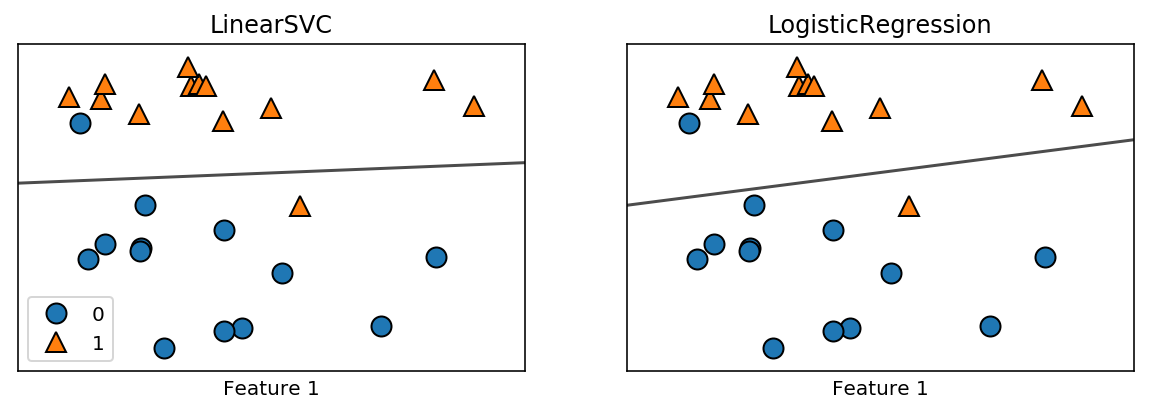

In [14]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# svm
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_xlabel("Feature 1")
axes[0].legend()

- forgeデータセットの第一特徴量をx軸に第2特徴量をy軸にとりLinearSVCとLogisticRegressionで見つけた決定境界を直線で表示している
- 直線の下がクラス0、上がクラス1

#### 正則化
- 両方のモデルはともにRidge回帰と同じようにL2正則化を行う(デフォルト設定)
- LogisticRegressionとLinearSVCにおける正則化強度を決定するトレードオフパラメータは「C」と呼ばれる
    - Cが大きくなると正則化は弱くなる
    - Cを大きくすると訓練データに対して適合度をあげようとする
    - Cを小さくするとデータポイント「大多数」に対して適合しようとするが、大きいCを用いるとここのデータポイントを正確に分類することができる

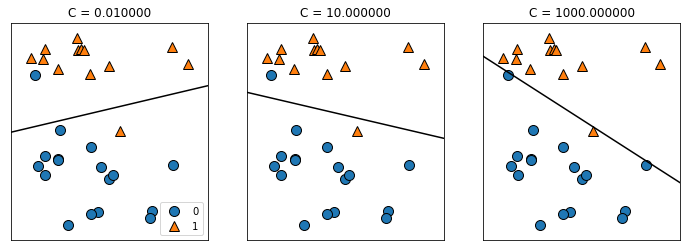

In [7]:
mglearn.plots.plot_linear_svc_regularization()

- 左のプロットは小さいCを用いて強力な正則化を行う場合に対応する
    - クラス0のほとんどの点が線の下に、クラス1のほとんどの点が先の上に来ている
    - この強力な正則化が効いたモデルは水平に近い。そして2つの点のクラス分類に失敗している
- Cが少し大きい場合に対応する真ん中のグラフでは、モデルは2点の分類に失敗したサンプルに着目するので、決定境界が傾いている
- Cがとても大きい場合に対応する右のグラフでは決定境界の傾きは更に急になりクラス0の全ての点を正しくクラス分類するようになる
    - クラス1の点はまだ失敗しているが、これはこのデータセットを直線で分類することは不可能だから
    - 全ての点を正しくクラス分類することに注力するあまり、クラス全体としてのレイアウトを捉えきれていない
    - このモデルはおそらく過剰適合している
    
#### 過剰適合の回避
- 回帰の場合と同様に、線形モデルによるクラス分類は、低次元空間においては成約が強すぎるように思えるかもしれない(決定平面が直線や平面にしかならないため)
    - 高次元の場合には線形モデルによるクラス分類は非常に強力になる
    - => 特徴量の数が多い場合に過剰適合を回避する方法が重要になってくる

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


- デフォルトのC=1はとても良い性能が出ている
- しかし、訓練セットとテストセットの精度がとても近いため、適合不足の可能性が高い

In [21]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.974
Test set score: 0.965


- C100にすると訓練セット精度が向上し、テストセット精度も僅かに向上する
    - 複雑なモデルの方が性能が高いはずだという仮説の裏付け

In [23]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


- 既に適合不足だったモデルから上記サンプルでいうと更に左によってしまい、訓練セット精度もテストセット精度もデフォルトパラメータより悪くなった

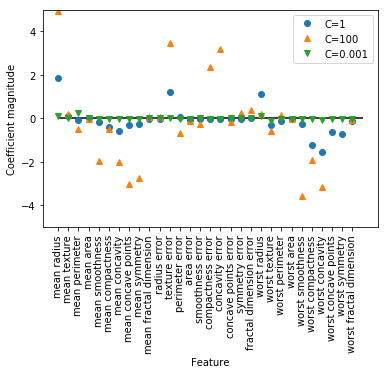

In [25]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

- LogisticRegressionはデフォルトでL2正則化が行われる(RIdgeによるものと似ている)
- 正則化を強くするほど、係数はより0近くへ押し込まれるが、ピッタリ0には決してならない
- 3番目の特徴量「mean perimeter」はC=100とC=1に対して係数は負だがC=0.001に対しては正になっている
    - このようなモデルを解釈する際はどの係数がクラス分類に影響を与えているかを考察することが大切
    - 例えば「texture error」が大きいことと「悪性(malignant)」が関係しているのではないかなど
    - しかし、「mean perimeter」のようにモデルによって係数の正負が変わってしまうと、どのモデルを見るかによって「良性」「悪性」が変わってしまう
- このように線形モデルの係数の解釈には常に眉唾を付けて聞かなければいけないことがわかる

#### L1正則化を使った場合
- より解釈しやすいモデルが欲しい場合はL1正則化を使うとよい場合がある
    - L1正則化は僅かな特徴量しか使わないように制限するため

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


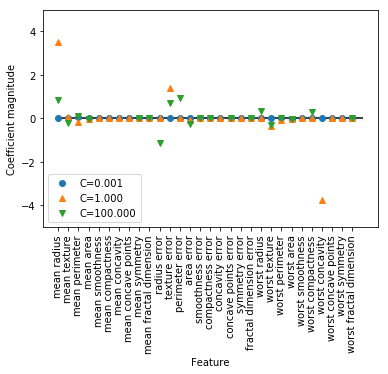

In [27]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
            C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

### 線形モデルによる多クラス分類
- 多くの線形モデルは2クラス分離にしか適用できない(ロジスティック回帰は例外)
- 2クラス分類アルゴリズムを多クラス分類アルゴリズムに拡張する一般的な手法として1対その他(one-vs.-rest)アプローチがある
    - 各クラスに対してそのクラスと他の全てのクラスを分類する２クラス分類モデルを学習する
    - クラスが沢山有る場合には沢山の2クラス分類機を使うことになる
    - 予測の際には全ての2クラス分類機をテストデータポイントに対して実行する
    - 一番スコアが高い分類器が「勝ち」その分類器に対応するクラスが予測結果となる
- 1クラスにつき1つの2クラス分類機があるということはクラスごとに係数ベクトル(w)と切片(b)がある
    
$$ y^ = w[0] ✕ x[0] + w[1] ✕ x[1] + ・・・ + w[p] ✕ x[p] + b $$

#### 3クラス分類を1対その他手法で分類する

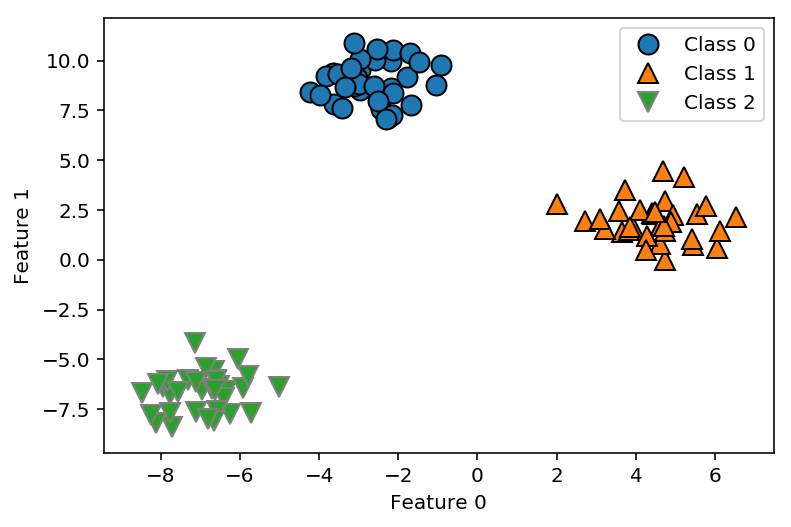

In [15]:
#　データセット(ガウス分布)
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [19]:
linear_svm = LinearSVC().fit(X, y)
# 係数配列の計上
print("Coefficetnt shape: ", linear_svm.coef_.shape)
# 切片配列の計上(b)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficetnt shape:  (3, 2)
[[-0.17492254  0.23140242]
 [ 0.47621604 -0.06937404]
 [-0.18913968 -0.20400409]]
Intercept shape:  (3,)


- coef_は、3つのクラスに対して2つの特徴量になっているため(3,2)になる
- intercept_は、各クラスの切片が入る

#### 3つのクラス分類機の直線を可視化する

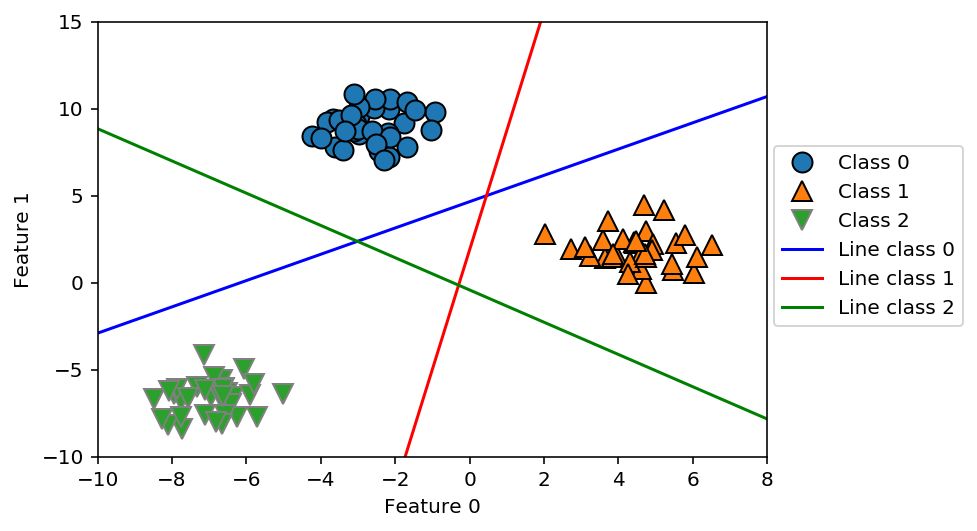

In [27]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))

- class0の点群を見た時
    - 訓練データ中のクラス0に属する全ての店がクラス0に対応する直線よりも上にある
        - => これはこのクラス分類機で「クラス0」に分類されたことを意味する
    - クラス0に属する点群はクラス2に対応する直線よりも上にある
        - => これはクラス2に対応するクラス分類器で「その他」の方に分類されたことを意味する
    - クラス0に属する点群はクラス1に対応する先よりも左にある
        - => これはクラス1に対応するクラス分類器で「その他」の方に分類されたことを意味する
    - したがってこの領域にある点群は「クラス0」として分類される

#### 備考
- 上にあるとかがよくわからないな

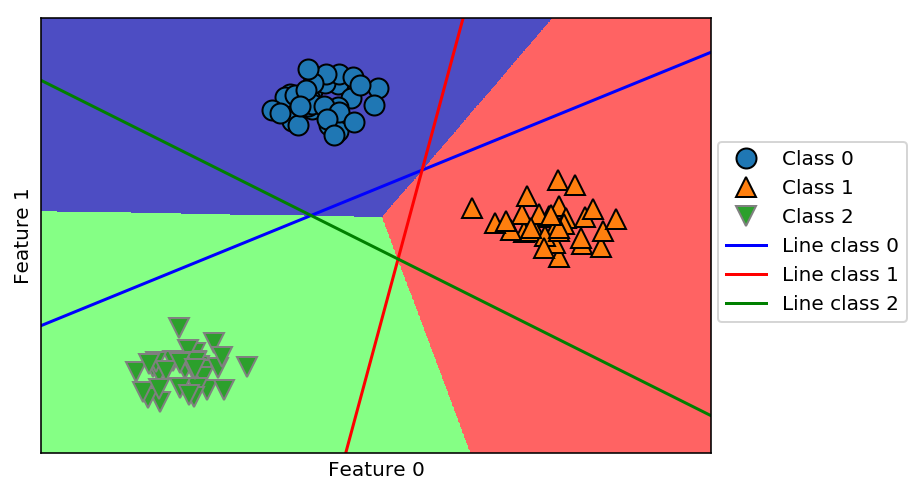

In [28]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))

- 2次元空間全ての点に対する予測を描画する
- 中央の三角形についてはクラス分類式の値が一番大きいクラス=その点が最も近い先をもつクラスになる

### 利点、欠点、パラメタ
- 線形モデルの主要なパラメータは、回帰モデルでは「alpha」、LinearSVCとLogisticRegressionでは「C」と呼ばれる正則化パラメタである
    - alphaが大きい場合、Cが小さい場合は単純なモデルに対応する
    - 通常、Cやalphaを調整する際には対数スケールで値を変更する
- もう一つ決めなくてはいけないことは、「L1正則化」を使うか「L2正則化」を使うか
    - 一部の特徴量だけが重要ならばL1を使うべき
    - そうでなければ、デフォルトではL2をつかった方がよい
    - L1はモデルの解釈のしやすさが重要な場合にも有効
- サンプル点が10万点、100万点もあるようなデータに対しては、LogisticRegressionとRidgeに「solver='sag'」オプションを使うことを検討したほうがよい
    - このオプションを使うと大きなデータセットに対して、デフォルトの場合よりも高速な場合がある
- もう一つの方法としては「SGDClassifier」クラスと「SGDReggressor」クラスを使う方法がある
    - これらのクラスはここで述べたモデルよりもさらに大規模なデータに適した線形モデルを実装している
- 線形モデルのもう一つの利点は予測手法が比較的理解しやすいということである
    - 回帰予測や分類予測は先に示した式によって行われる。しかし係数がどうしてその値になっているのかはそれほど明らかになっていない